Loan Applicants Segmentation

In [122]:
# Import the python libraries and load the dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

df = pd.read_csv("loan_approval_dataset.csv")

In [123]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [124]:
# Checking the shape of our DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [125]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


 Data Cleaning

In [126]:
# checking for null values
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [127]:
# checking for duplicates
df.dropna(inplace=True)

In [128]:
# convert values in a column to absolute value

df[' residential_assets_value'] = df[' residential_assets_value'].abs()
# count if there are negative values left
(df[' residential_assets_value'] < 0).sum()

np.int64(0)

In [129]:
# remove white spaces in column names and all values
df.columns = df.columns.str.strip()
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

 Adding new columns

In [130]:
# addition of CIBIL rating column
# add CIBIL rating column with values(Poor, Average, Good and Excellent)

def cibil_rating(value):
    if 300 <= value <= 549:
        return "Poor"
    elif 550 <= value <= 649:
        return "Average"
    elif 650 <= value <= 749:
        return "Good"
    elif 750 <= value <= 900:
        return "Excellent"
    else:
        return "Error"

df["CIBIL Ratings"] = df["cibil_score"].apply(cibil_rating)
df.head(10)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL Ratings
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,Poor
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved,Good
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected,Poor
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved,Excellent
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected,Poor


In [131]:
# addition of the income levels income
# grouping customers according to incomes

def income_values(value):
  if 100000 <= value <= 1000000:
    return "Low"
  elif 1000001 <= value <= 4000000:
    return "Low-Middle"
  elif 4000001 <= value <= 7500000:
    return "Upper-Middle"
  elif 7500001 <= value <= 10000000:
    return "High"
  else:
    return "Very High Income"

df["Income Levels"] = df["income_annum"].apply(income_values)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL Ratings,Income Levels
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High


In [132]:
# adding the loan amount rating
# grouping loan amounts as bronze, silver, gold and platinum

def loan_rating(value):
  if 100000 <= value <= 10000000:
    return "Bronze"
  elif 10000001 <= value <= 20000000:
    return "Silver"
  elif 20000001 <= value <= 30000000:
    return "Gold"
  elif 30000001 <= value <= 40000000:
    return "Platinum"
  else:
    return "Very High Income"

df['Loan Rating'] = df['loan_amount'].apply(loan_rating)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL Ratings,Income Levels,Loan Rating
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold


In [133]:
# addition of the loan term range column
# group loan term as short-term, intermediate and long-term

def loan_term_range(value):
  if value <= 7:
    return "Short-Term"
  elif 8 <= value <= 14:
    return "Intermediate"
  elif 15 <= value <= 20:
    return "Long-Term"
  else:
    return "Very Long-Term"

df['Loan Term Type'] = df['loan_term'].apply(loan_term_range)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL Ratings,Income Levels,Loan Rating,Loan Term Type
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term


In [134]:
# addition of the number of  dependents column
#  group dependents class as low, moderate and high

def dependents(value):
  if value <=1:
    return "Low"
  elif 2 <= value <= 3:
    return "Moderate"
  elif 4 <= value <= 5:
    return "High"
  else:
    return "Unknown"

df['Dependent Levels'] = df['no_of_dependents'].apply(dependents)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL Ratings,Income Levels,Loan Rating,Loan Term Type,Dependent Levels
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High


# Exploratory Data Analysis
## Customer Segmentation
### Income

In [135]:

# grouping customers according to income levels

income = df['Income Levels'].value_counts().reset_index()
income = income.rename(columns={'index': 'Income Levels', 'count': 'No of Applicants'})
income.head()

,Income Levels,No of Applicants
0,Upper-Middle,1548
1,Low-Middle,1284
2,High,1047
3,Low,390


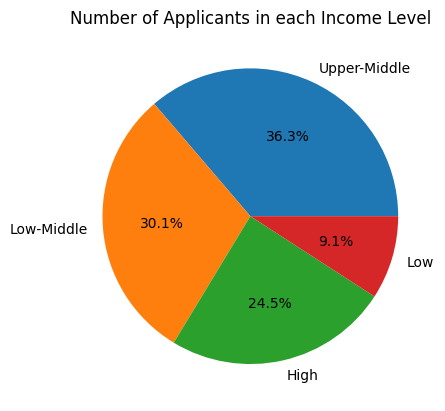

In [136]:
# plotting a pie chart
plt.pie(income['No of Applicants'], labels=income['Income Levels'], autopct='%1.1f%%')
plt.title('Number of Applicants in each Income Level')
plt.show()

### Segment according to number of dependents

In [137]:
dependents = df['Dependent Levels'].value_counts().reset_index()
dependents = dependents.rename(columns={'index': 'Dependent Levels', 'count': 'No of Applicants'})
dependents.head()

,Dependent Levels,No of Applicants
0,Moderate,1435
1,High,1425
2,Low,1409


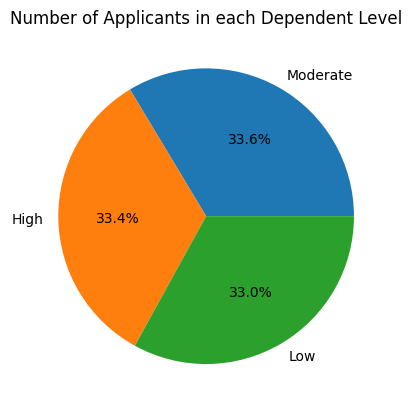

In [138]:
# plotting a pie chart
plt.pie(dependents['No of Applicants'], labels=dependents['Dependent Levels'], autopct='%1.1f%%')
plt.title('Number of Applicants in each Dependent Level')
plt.show()

### Segment according to education

In [139]:
education = df['education'].value_counts().reset_index()
education = education.rename(columns={'index': 'Education Levels', 'count': 'No of Applicants'})
education.head()

,education,No of Applicants
0,Graduate,2144
1,Not Graduate,2125


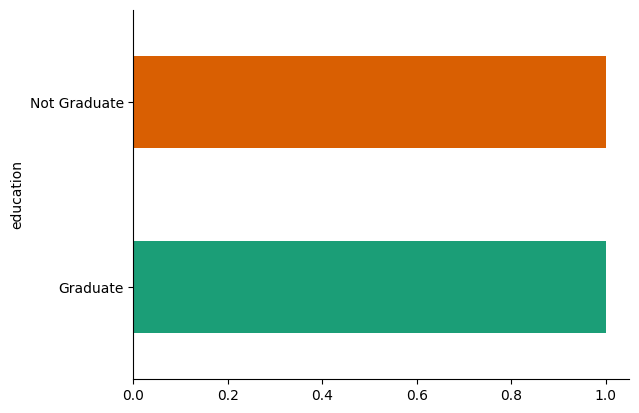

In [140]:
# plotting a horizontal barchart
from matplotlib import pyplot as plt
import seaborn as sns
_df_15.groupby('education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

###Segment according to Employment

In [141]:
employment = df['self_employed'].value_counts().reset_index()
employment = employment.rename(columns={'index': 'Self employment', 'count': 'No of Applicants'})
employment.head()

,self_employed,No of Applicants
0,Yes,2150
1,No,2119


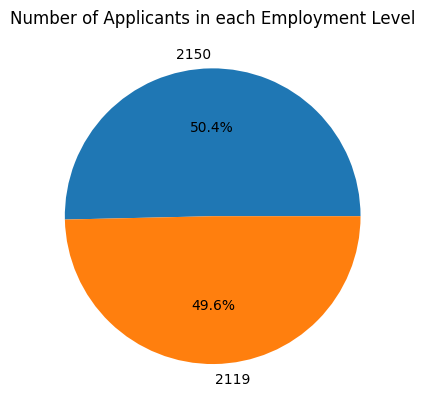

In [142]:
# plotting a pie chart
plt.pie(employment['No of Applicants'], labels=employment['No of Applicants'], autopct='%1.1f%%')
plt.title('Number of Applicants in each Employment Level')
plt.show()

Rate of loan approvals

In [143]:
# overal rate
# general loan approval rate
loans = df['loan_status'].value_counts().reset_index()
loans = loans.rename(columns={'loan_status': 'Loan Status', 'count': 'Total'})
loans.head()

,Loan Status,Total
0,Approved,2656
1,Rejected,1613


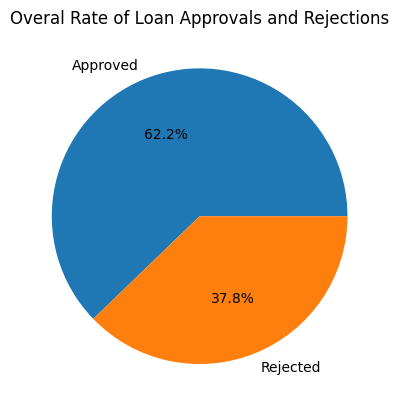

In [144]:
# plotting a pie chart
plt.pie(loans['Total'], labels=loans['Loan Status'], autopct='%1.1f%%')
plt.title('Overal Rate of Loan Approvals and Rejections')
plt.show()

### Loan approvals according to level of education

In [145]:
# group data by education and loan status
education = df.groupby(['education', 'loan_status']).size().reset_index()

education = education[education['loan_status'].isin(['Approved', 'Rejected'])]
education = education.rename(columns={0: 'Total'})
education.head()

,education,loan_status,Total
0,Graduate,Approved,1339
1,Graduate,Rejected,805
2,Not Graduate,Approved,1317
3,Not Graduate,Rejected,808


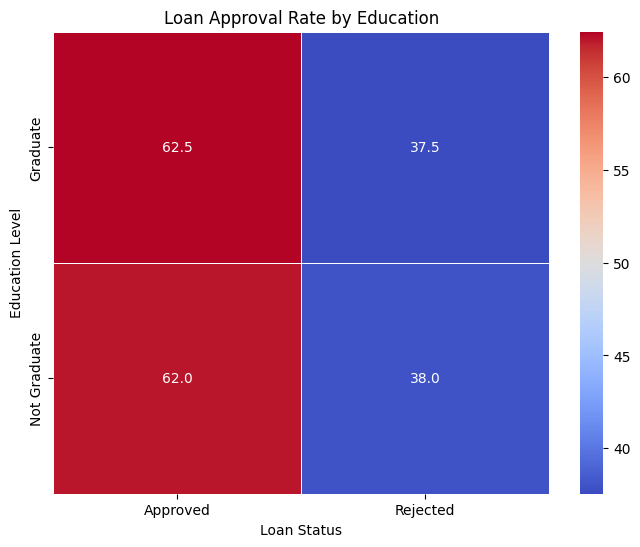

In [146]:
# create a pivot table
pivot_table = education.pivot_table(index='education', columns='loan_status', values='Total', aggfunc='sum')
row_totals = pivot_table.sum(axis=1)
percentage = pivot_table.div(row_totals, axis=0) * 100

# create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(percentage, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)

# labelling the heatmap
plt.title('Loan Approval Rate by Education')
plt.xlabel('Loan Status')
plt.ylabel('Education Level')
plt.show()

# there is no significant difference when issuing  loan approval with education in mind

### loan approvals according to type of employment

In [147]:
employment_type = df.groupby(['self_employed', 'loan_status']).size().reset_index()

# filter to include approval or rejected
employment_type = employment_type[employment_type['loan_status'].isin(['Approved', 'Rejected'])]
employment_type = employment_type.rename(columns={0: 'Total'})
employment_type.head()

,self_employed,loan_status,Total
0,No,Approved,1318
1,No,Rejected,801
2,Yes,Approved,1338
3,Yes,Rejected,812


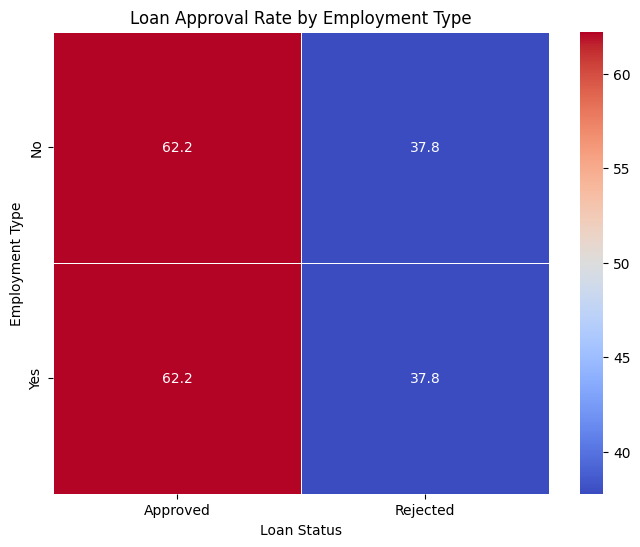

In [148]:
# create a pivot table
pivot_table = employment_type.pivot_table(index='self_employed', columns='loan_status', values='Total', aggfunc='sum')
row_totals = pivot_table.sum(axis=1)
percentage = pivot_table.div(row_totals, axis=0) * 100

# create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(percentage, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)

# label the heatmap
plt.title('Loan Approval Rate by Employment Type')
plt.xlabel('Loan Status')
plt.ylabel('Employment Type')
plt.show()

# there is no significant difference when issuing  loan approval with employment type in mind

### loan approval rate by cibil rating
### the influence of CIBIL rating on loan approvals

In [151]:
# group data according to CIBIL rating and loans status and count for each combination

cibil_rates = df.groupby(['CIBIL Ratings', 'loan_status']).size().reset_index()
cibil_rates = cibil_rates[cibil_rates['loan_status'].isin(['Approved', 'Rejected'])]
cibil_rates = cibil_rates.rename(columns={0: 'Total'})
cibil_rates.head(9)

# when a client has poor cibil rating, chances of loan being rejected are very much high

,CIBIL Ratings,loan_status,Total
0,Average,Approved,681
1,Average,Rejected,2
2,Excellent,Approved,1050
3,Excellent,Rejected,6
4,Good,Approved,740
5,Good,Rejected,5
6,Poor,Approved,185
7,Poor,Rejected,1600


Text(0.5, 1.0, 'Loan Approval Rate by CIBIL Rating')

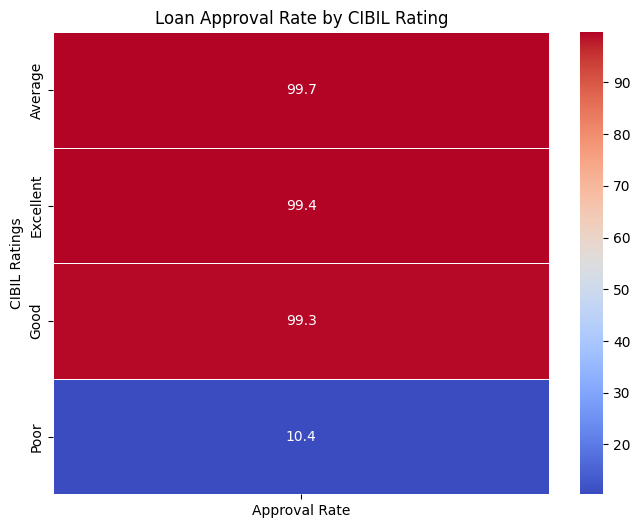

In [150]:
# pivot table
pivot_table = cibil_rates.pivot_table(index='CIBIL Ratings', columns='loan_status', values='Total', aggfunc='sum')

# calculate the approval rates
pivot_table['Approval Rate'] = pivot_table['Approved'] / (pivot_table['Approved'] + pivot_table['Rejected']) *100

# create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table['Approval Rate'].to_frame(), annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)

# label the heatmap
plt.title('Loan Approval Rate by CIBIL Rating')

# average , good and excellent CIBIL rating, chances of being awarded a loan are 99.0%

## Correlation Analysis

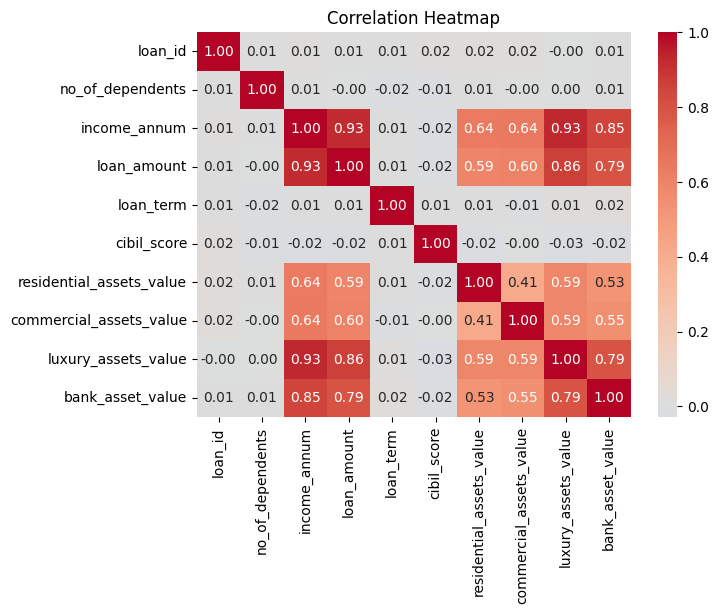

In [152]:
correlation_matrix = df.corr(numeric_only=True)

# create the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)

# label the heatmap
plt.title('Correlation Heatmap')
plt.show()

# as one value increases, so as the other
# positive values represent positive correlation
#negative values represent negative correlation
# values close to 1 represent a high correlation as compared to those close to zero

In [153]:
# correlation between assset value and income
assets = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
income = 'income_annum'

# calculate the correction (Pearson correlation)
correlations = df[assets + [income]].corr()
correlations.head()

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,income_annum
residential_assets_value,1.000000,0.414799,0.590919,0.527401,0.636824
commercial_assets_value,0.414799,1.000000,0.591128,0.548576,0.640328
luxury_assets_value,0.590919,0.591128,1.000000,0.788517,0.929145
bank_asset_value,0.527401,0.548576,0.788517,1.000000,0.851093
income_annum,0.636824,0.640328,0.929145,0.851093,1.000000


In [154]:
# correlation between asset value and loan
assets = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
loan = 'loan_amount'

# calculate the correction (Pearson correlation)
correlations = df[assets + [loan]].corr()
correlations.head()

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_amount
residential_assets_value,1.000000,0.414799,0.590919,0.527401,0.594582
commercial_assets_value,0.414799,1.000000,0.591128,0.548576,0.603188
luxury_assets_value,0.590919,0.591128,1.000000,0.788517,0.860914
bank_asset_value,0.527401,0.548576,0.788517,1.000000,0.788122
loan_amount,0.594582,0.603188,0.860914,0.788122,1.000000


## Asset value impact/influence on loan approval/eligibility

In [169]:
# if there is a relation between asset value and getting a loan approval
# splitting data into two groups based on loan status

approved = df[df['loan_status']== 'Approved']
rejected = df[df['loan_status']== 'Rejected']

# perform a t-test
assets = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
for column in assets:
  t_stat, p_value = ttest_ind(approved[column], rejected[column], equal_var=False)
  print(f"T-Test for{column}:")
  print(f"T-statistic: {t_stat}")
  print(f"P-value: {p_value}")
  if p_value < 0.05: # 95% confidence level
        print(f"The difference in {column} between approved and rejected loans is statistically significant")
  else:
         print(f"The difference in {column} between approved and rejected loans is not statistically significant")

T-Test forresidential_assets_value:
T-statistic: -0.9399394365500209
P-value: 0.34731539500224484
The difference in residential_assets_value between approved and rejected loans is not statistically significant
T-Test forcommercial_assets_value:
T-statistic: 0.5387741456120381
P-value: 0.5900779272018964
The difference in commercial_assets_value between approved and rejected loans is not statistically significant
T-Test forluxury_assets_value:
T-statistic: -1.013970039592796
P-value: 0.3106683217824068
The difference in luxury_assets_value between approved and rejected loans is not statistically significant
T-Test forbank_asset_value:
T-statistic: -0.4448616890142232
P-value: 0.6564475917396153
The difference in bank_asset_value between approved and rejected loans is not statistically significant


## using ANOVA to determine a correlation between income and asset value

In [170]:
# null hypothesis : There is no relation(significant difference) between assets value and income
# alternative hypothesis : There exist a relationship (significant difference) between asset value and income

# extract values in columns
residential_assets = df['residential_assets_value']
commercial_assets = df['commercial_assets_value']
luxury_assets = df['luxury_assets_value']
bank_asset = df['bank_asset_value']
income = df['income_annum']

# perform ANOVA
f_statistic, p_value = f_oneway(residential_assets, commercial_assets, luxury_assets, bank_asset)

print('The f statistics:', f_statistic)
print('The p value:', p_value)

# interpretation of the results
if p_value < 0.05:
    print('There is a significant difference of income on asset value')
else:
    print('There is no significant difference of income on asset value')

    # we reject tne null hypothesis and use the alternative hypothesis

The f statistics: 2544.6998730546197
The p value: 0.0
There is a significant difference of income on asset value


### Correlation between income and loan amount


In [173]:
from scipy.stats import ttest_ind

income = df['income_annum']
loan = df['loan_amount']  # Use the actual column data, not a list

# Perform an independent t-test
t_stat, p_value = ttest_ind(income, loan, equal_var=True)

print('The t-statistic:', t_stat)
print('The p-value:', p_value)

# Interpret results
if p_value < 0.05:
    print('There is a significant difference between loan amount and income per annum.')
else:
    print('There is no significant difference between loan amount and income per annum.')


The t-statistic: -69.51489699866843
The p-value: 0.0
There is a significant difference between loan amount and income per annum.


### box plot to represent correlation between income and loan amount

<ipython-input-175-54bba1b3a21d>:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([income, loan], labels=['Income per Annum', 'Loan Amount'])


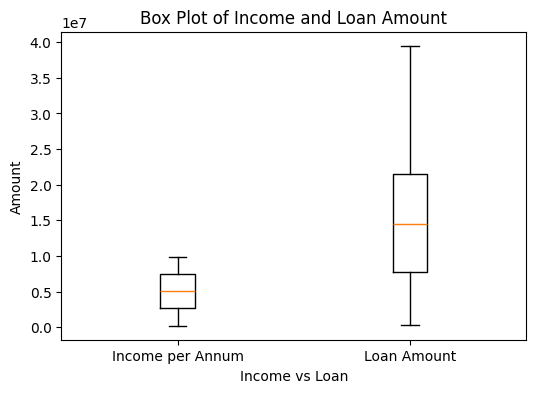

In [175]:
income = df['income_annum']
loan = df['loan_amount']

# Create the figure
plt.figure(figsize=(6,4))

# Plot the box plot
plt.boxplot([income, loan], labels=['Income per Annum', 'Loan Amount'])

# Chart labels
plt.xlabel('Income vs Loan')
plt.ylabel('Amount')
plt.title('Box Plot of Income and Loan Amount')

# Show the plot
plt.show()

## Chi-Square Analysis
### Determine correlation between loan status and no of dependents

In [177]:
# creating a contigency table
contigency_table = pd.crosstab(df['loan_status'], df['Dependent Levels'])

# perform a chi-square
chi2, p_value, dof, expected = chi2_contingency(contigency_table)

print('The chi-square statistic:', chi2)
print('The p-value:', p_value)
print('The dof is:', dof)

# set the significane level
alpha = 0.05

if p_value < alpha:
    print('There is a significant relationship between loan status and no of dependents')
else:
    print('There is no significant relationship between loan status and no of dependents')

The chi-square statistic: 1.1296798036848839
The p-value: 0.5684511474541935
The dof is: 2
There is no significant relationship between loan status and no of dependents


# Logistic Regression

In [183]:
def edu_status(status):
  if status == 'Graduate':
    return 1
  elif status == 'Not Graduate':
    return 0
  else:
    return 'Unknown'

df['education_status'] = df['education'].apply(edu_status)

def type_employment(status):
  if status == 'Yes':
    return 1
  elif status == 'No':
    return 0
  else:
    return 'Unknown'

df['Employment_status'] = df['self_employed'].apply(type_employment)

def loan_approval(status):
  if status == 'Approved':
    return 1
  elif status == 'Rejected':
    return 0
  else:
    return 'Unknown'

df['Loan approval'] = df['loan_status'].apply(loan_approval)

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,...,bank_asset_value,loan_status,CIBIL Ratings,Income Levels,Loan Rating,Loan Term Type,Dependent Levels,education_status,Employment_status,Loan approval
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,...,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate,1,0,1
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,...,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low,0,1,0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,...,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate,1,0,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,...,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate,1,0,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,...,5000000,Rejected,Poor,High,Gold,Long-Term,High,0,1,0


In [189]:
# separating X- axis values
X = df.drop(columns=['loan_id', 'CIBIL Ratings', 'Income Levels', 'Loan Rating',
                     'Loan Term Type', 'Dependent Levels', 'education',
                     'self_employed', 'Loan approval', 'loan_status'])

X.head()


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_status,Employment_status
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1


In [190]:
# defining the y-axis
y = df['Loan approval']
y.head()

,Loan approval
0,1
1,0
2,0
3,0
4,0


## importing the regression model modules


In [195]:
# importing Logistic regression modules

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [196]:
# split data to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [198]:
X_train

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_status,Employment_status
4084,0,9300000,29400000,10,351,24200000,6800000,35800000,6100000,0,1
3556,5,5200000,20700000,2,538,3200000,2000000,14600000,3600000,1,0
2323,1,1900000,4500000,12,742,1200000,2000000,4400000,1200000,0,1
740,3,4100000,15900000,12,538,3900000,800000,8800000,5700000,0,0
1215,5,9600000,38000000,10,359,2100000,13600000,38200000,9400000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1646,0,5900000,20300000,4,806,300000,3700000,16400000,4800000,0,0
840,4,3500000,8900000,4,478,4000000,3900000,11300000,3800000,1,1
1144,1,8400000,24600000,14,817,1800000,13100000,31300000,8200000,0,0
48,3,5500000,20500000,12,634,800000,8600000,18500000,8200000,0,0


### Scaling our data

In [199]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [200]:
X_train_scaled

array([[-1.46148376,  1.48642509,  1.54664878, ...,  0.32060948,
        -1.00268097,  0.99266412],
       [ 1.47642896,  0.02091063,  0.58652234, ..., -0.44959563,
         0.9973262 , -1.00739009],
       [-0.87390121, -1.15864979, -1.20129933, ..., -1.18899253,
        -1.00268097,  0.99266412],
       ...,
       [-0.87390121,  1.16472679,  1.01692385, ...,  0.96758177,
        -1.00268097, -1.00739009],
       [ 0.30126387,  0.12814339,  0.56445046, ...,  0.96758177,
        -1.00268097, -1.00739009],
       [-0.87390121,  1.5579136 ,  0.50927078, ...,  0.35141768,
        -1.00268097, -1.00739009]])

In [201]:
X_test_scaled

array([[ 0.88884642, -1.58758085, -1.44408992, ..., -1.43545817,
         0.9973262 , -1.00739009],
       [-0.87390121,  0.66430722,  0.54237859, ...,  0.13576025,
        -1.00268097,  0.99266412],
       [ 0.30126387,  1.05749403,  0.93967229, ...,  1.1832392 ,
         0.9973262 , -1.00739009],
       ...,
       [ 0.30126387,  1.62940211,  1.70115189, ...,  1.64536226,
        -1.00268097,  0.99266412],
       [ 1.47642896,  1.66514636,  2.48470336, ...,  0.35141768,
        -1.00268097,  0.99266412],
       [-0.28631867, -0.01483363,  0.15612082, ..., -0.20313   ,
        -1.00268097,  0.99266412]])

In [203]:
# training the model
log_reg = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)

In [204]:
# prediction
log_reg.predict(X_train_scaled)

array([0, 1, 1, ..., 1, 1, 1])

In [205]:
# accuracy
log_reg.score(X_train_scaled, y_train)

# we have an accuracy of 92%

0.9200133868808568

In [207]:
# application of model to new dataset
log_reg.score(X_test_scaled, y_test)

0.912568306010929